# Made by : Abdelbaki GUIR



# Clustering: Application to Fashion MNIST

In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset. 


In [257]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

## A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


## Preprocessing the dataset using PCA 

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Work to do :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components, print the corresponding "explained variance ratio". 
- Comment the pictures.

The number of images = 10000
The number of classes = 10


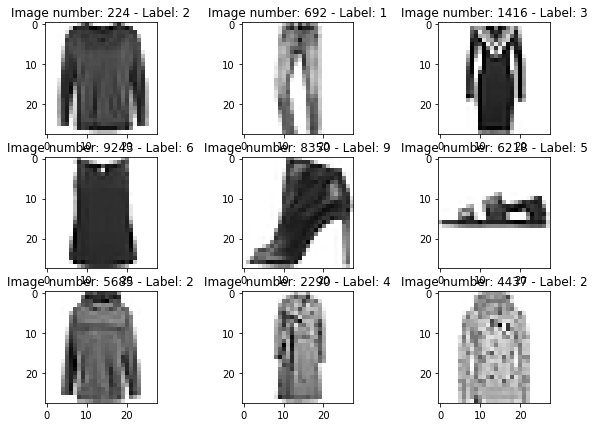

In [258]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()                                         
    j=j+1

plt.show()



#### 0 is Tshirt 
####1 is Trouser
####2 is Pullover
####3 is Dress
####4 is Coat
####5 is Sandal
####6 is Shirt
####7 is Sneaker
####8 is Bag
####9 is Ankle Boot

Original dimension of the dataset (before PCA)  =  (10000, 784)
Number of dimensions after PCA (0.90) =  (10000, 82)


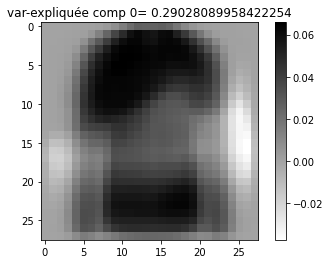

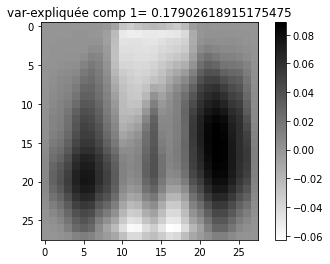

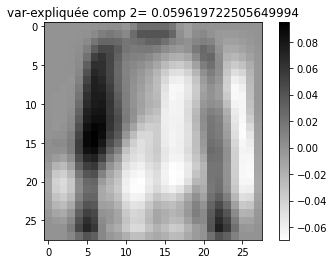

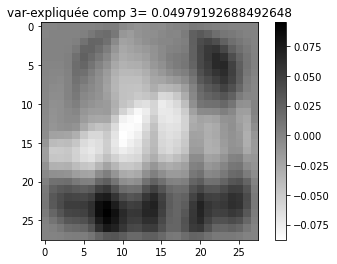

In [259]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)

print("Original dimension of the dataset (before PCA)  = ", Xn.shape )
print("Number of dimensions after PCA (0.90) = ", Xn_r.shape)
      
# COMPLETE THE CODE HERE...
for i in range (4):
    plt.title("var-expliquée comp {}= {}" .format(i,pca.explained_variance_ratio_[i]))
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()
    plt.show()

## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [260]:
import time
from sklearn.cluster import KMeans
start_time = time.process_time()
target_nb_clusts = 1000
# COMPLETE THE CODE HERE...
k_means = KMeans(target_nb_clusts)
k_means.fit(Xn_r)

nb_clusts = k_means.cluster_centers_.shape[0]
# nb_clusts1 = k_means.cluster_centers_.shape[1]

print("The numbers of k-means resulting clusters is ", nb_clusts)
execution_time = time.process_time() - start_time
print(f'duration: {execution_time} seconds')

The numbers of k-means resulting clusters is  1000
duration: 105.18559859400011 seconds


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

**in addition** ✈
We can show how many images are in every Cluster with a simple beautiful loop !

In [263]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]
y=0
for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)
print("The list of the 1000 Cluster is :") 
x = np.array(cluster_index)
for i in range(x.shape[0]):
  print("the",i,"cluster has ",len(x[i]),"entities")
  y+=len(x[i])
print("sum of entities is", y)

The list of the 1000 Cluster is :
the 0 cluster has  9 entities
the 1 cluster has  15 entities
the 2 cluster has  7 entities
the 3 cluster has  24 entities
the 4 cluster has  15 entities
the 5 cluster has  7 entities
the 6 cluster has  7 entities
the 7 cluster has  12 entities
the 8 cluster has  14 entities
the 9 cluster has  27 entities
the 10 cluster has  5 entities
the 11 cluster has  11 entities
the 12 cluster has  17 entities
the 13 cluster has  6 entities
the 14 cluster has  14 entities
the 15 cluster has  6 entities
the 16 cluster has  14 entities
the 17 cluster has  11 entities
the 18 cluster has  28 entities
the 19 cluster has  8 entities
the 20 cluster has  13 entities
the 21 cluster has  15 entities
the 22 cluster has  39 entities
the 23 cluster has  4 entities
the 24 cluster has  9 entities
the 25 cluster has  4 entities
the 26 cluster has  9 entities
the 27 cluster has  21 entities
the 28 cluster has  6 entities
the 29 cluster has  8 entities
the 30 cluster has  15 entitie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


 entities
the 251 cluster has  10 entities
the 252 cluster has  10 entities
the 253 cluster has  11 entities
the 254 cluster has  14 entities
the 255 cluster has  8 entities
the 256 cluster has  5 entities
the 257 cluster has  22 entities
the 258 cluster has  11 entities
the 259 cluster has  11 entities
the 260 cluster has  15 entities
the 261 cluster has  11 entities
the 262 cluster has  5 entities
the 263 cluster has  7 entities
the 264 cluster has  8 entities
the 265 cluster has  5 entities
the 266 cluster has  21 entities
the 267 cluster has  10 entities
the 268 cluster has  24 entities
the 269 cluster has  3 entities
the 270 cluster has  9 entities
the 271 cluster has  11 entities
the 272 cluster has  6 entities
the 273 cluster has  6 entities
the 274 cluster has  9 entities
the 275 cluster has  3 entities
the 276 cluster has  4 entities
the 277 cluster has  11 entities
the 278 cluster has  6 entities
the 279 cluster has  11 entities
the 280 cluster has  14 entities
the 281 cluste

In order to assess the quality of produced clusters, here we will visualize the content of few clusters. 

<Figure size 720x504 with 0 Axes>

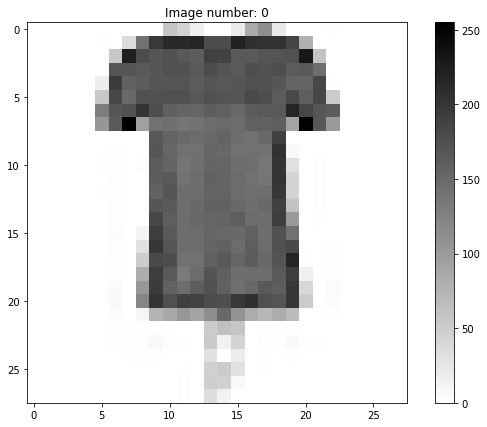

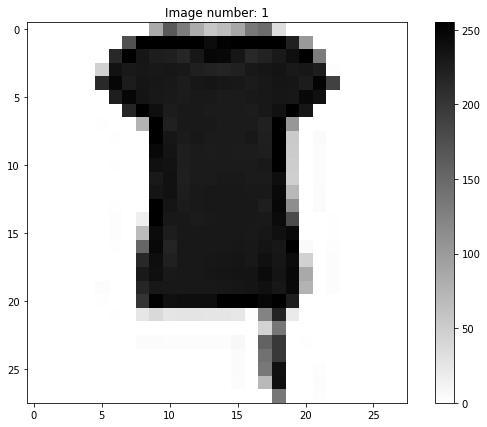

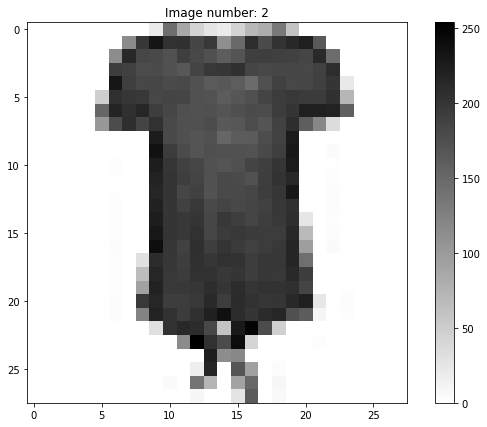

In [274]:

fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)
clust0 = 1
clust1 = 2 # ID of cluster to visualize
clust2 = 3 # ID of cluster to visualize
clust3 = 935 # ID of cluster to visualize
img = 0
clusterI = cluster_index[clust3]
for i in clusterI:
    fig = plt.figure();
    fig.set_figheight(7)
    fig.set_figwidth(10)
    plt.imshow(Xn[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()       
    plt.title('Image number: {}'.format(img))      # affichage de l'indice de l'image dans le cluster                             
    plt.show()
    img = img+1


plt.show()

### We can notice that the clusters have only the T-Shirts which confirms the massive job done by kmeans !

We can even plot the histogram of the class labels of vectors contained in the cluster.

[4. 2. 4. 6. 2. 6. 6.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[6. 0. 0.]


([<matplotlib.axis.XTick at 0x7f308bf3e790>,
 [Text(0, 0, 'Tshirt'),
  Text(0, 0, 'Trouser'),
  Text(0, 0, 'Pullover'),
  Text(0, 0, 'Dress'),
  Text(0, 0, 'Coat'),
  Text(0, 0, 'Sandals'),
  Text(0, 0, 'Shirt'),
  Text(0, 0, 'Sneaker'),
  Text(0, 0, 'Bag'),
  Text(0, 0, 'Boots')])

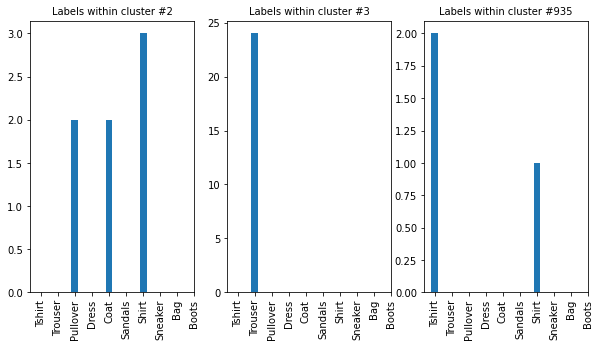

In [275]:

class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'}
# Create and fill an array "clusterL" with the labels of images belonging to a cluster 
clusterL1 = []
for i in range (len(cluster_index[clust1])):
    clusterL1.append(np.linalg.norm(yn[cluster_index[clust1][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL2 = []
for i in range (len(cluster_index[clust2])):
    clusterL2.append(np.linalg.norm(yn[cluster_index[clust2][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL3 = []
for i in range (len(cluster_index[clust3])):
    clusterL3.append(np.linalg.norm(yn[cluster_index[clust3][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
print(np.array(clusterL1))
print(np.array(clusterL2))
print(np.array(clusterL3))
plt.figure(figsize=(10,5))
plt.subplot(131),plt.hist(clusterL1, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('2'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(132),plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('3'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(133),plt.hist(clusterL3, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('935'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.


❎ we can see that the first cluster is consisted of images most of them are class [0] which is a **Tshirt**, we can visualize the content easily by the command before above, therefore for the cluster number 548 we can see that it's consisted of 5 images of class [3] which is a **dress** ! we can visualise the images as shown below to show the beautiful impact of Kmeans Clustering !

<Figure size 720x504 with 0 Axes>

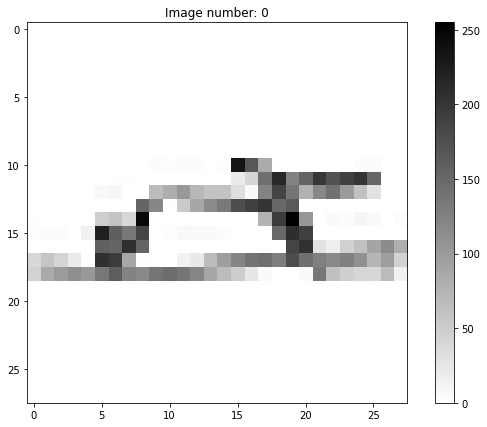

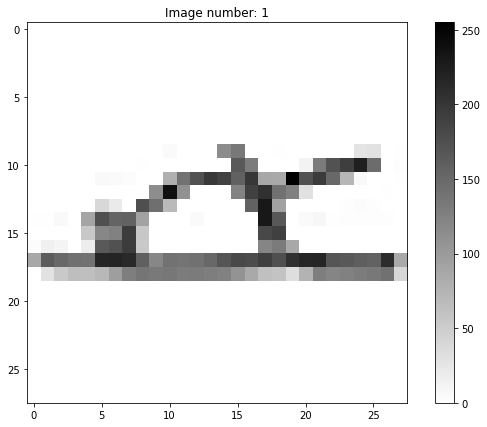

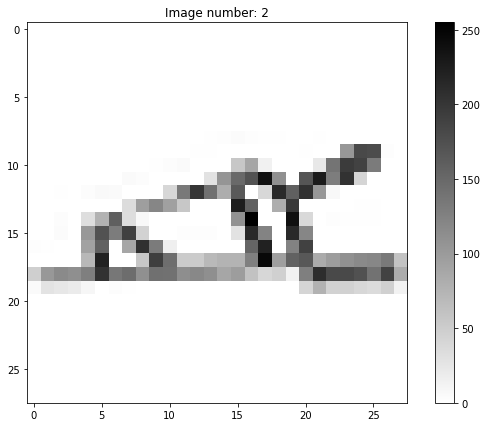

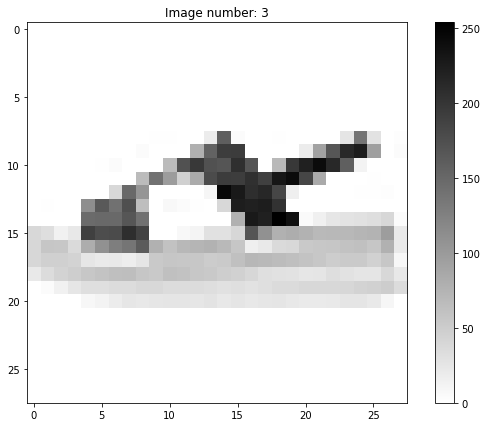

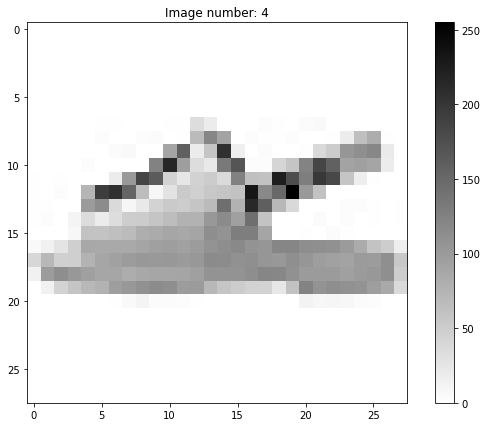

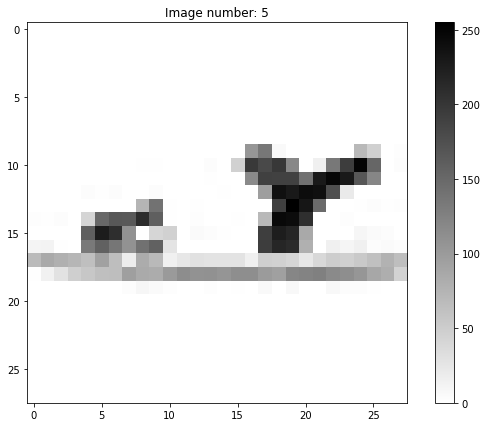

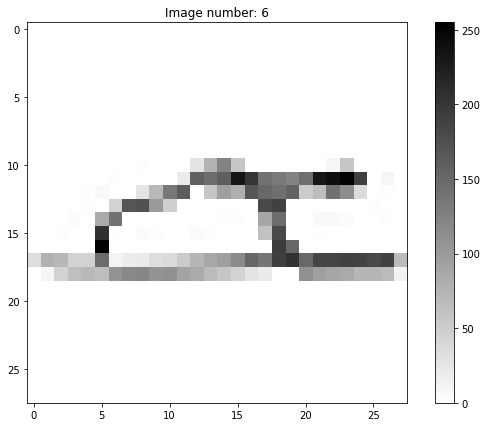

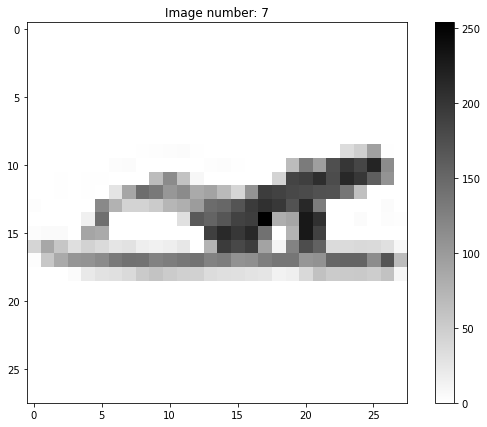

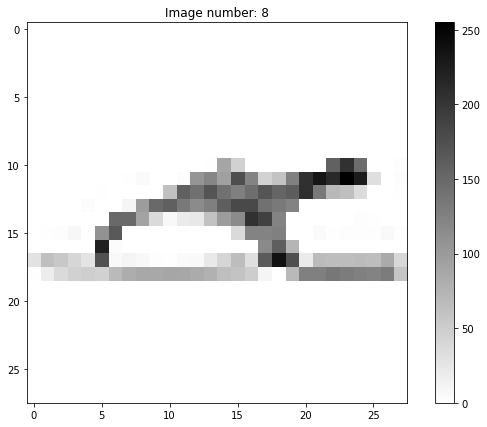

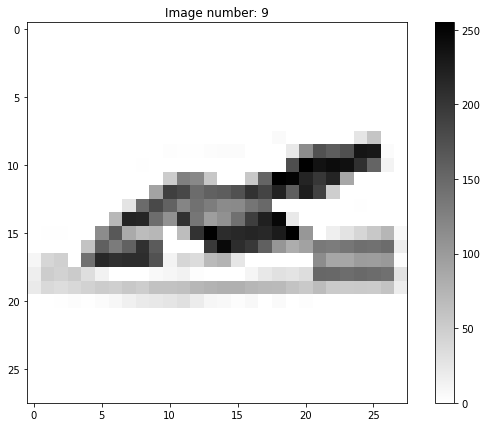

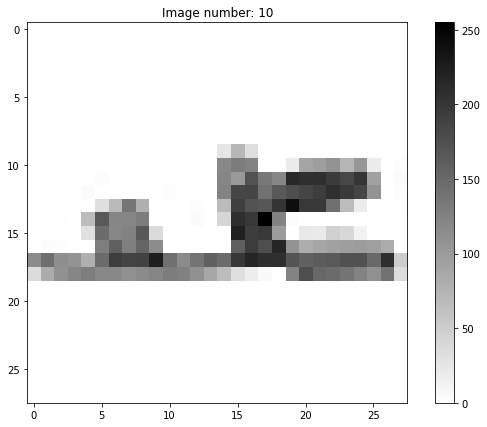

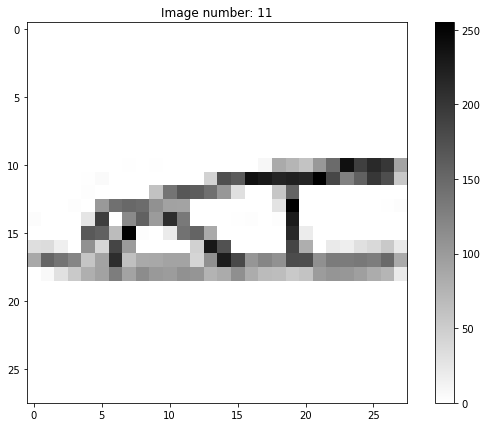

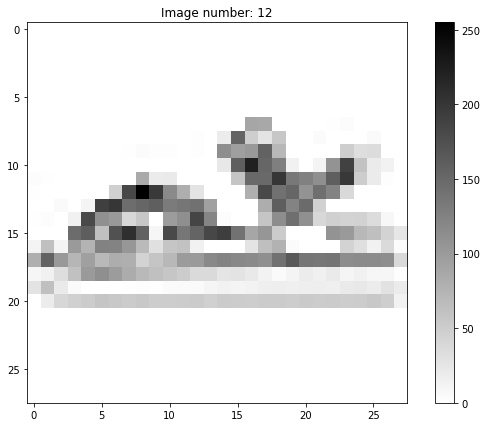

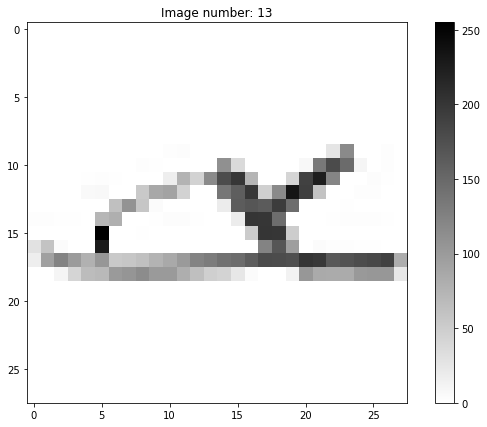

In [266]:
fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)
img = 0
clusterI = cluster_index[clust3]
for i in clusterI:
    fig = plt.figure();
    fig.set_figheight(7)
    fig.set_figwidth(10)
    plt.imshow(Xn[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()       
    plt.title('Image number: {}'.format(img))      # affichage de l'indice de l'image dans le cluster                             
    plt.show()
    img = img+1


plt.show()

## Your analysis here:
✅ Preprocessing the data :
##### ♦ Firstly We preprocessed the Data set with pca (inertia proportion = 0.9), The number of images = 10000, The number of classes = 10, 
#### 💹 K-Means :
##### ▶ We see clearly by the histogram that all the images in the cluster shown above , have almost the  same class in the original data !,
K-Means performed the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 
#####▶ which confirms once again the excellent work done by Kmeans !



In [267]:
# without acp
start_time = time.process_time()
target_nb_clusts = 1000
# COMPLETE THE CODE HERE...
k_means = KMeans(target_nb_clusts)
k_means.fit(Xn)

nb_clusts1 = k_means.cluster_centers_.shape[0]
# nb_clusts1 = k_means.cluster_centers_.shape[1]

print("The numbers of k-means resulting clusters is ", nb_clusts1)
execution_time = time.process_time() - start_time
print(f'duration: {execution_time} seconds')


The numbers of k-means resulting clusters is  1000
duration: 488.07300564599973 seconds


In [268]:
nb_clusts1 = k_means.cluster_centers_.shape[0]

In [269]:
#2D matrix  for an array of indexes of the given label
cluster_index1= [[] for j in range(nb_clusts1)]
z = 0
for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts1):
        if k_means.labels_[i] == j:
            cluster_index1[j].append(i)
print("The list of the 1000 Cluster is :") 
x = np.array(cluster_index1)
for i in range(x.shape[0]):
  print("the",i,"cluster has ",len(x[i]),"entities")
  z+= len(x[i])
print("entites =",z)

The list of the 1000 Cluster is :
the 0 cluster has  1 entities
the 1 cluster has  22 entities
the 2 cluster has  7 entities
the 3 cluster has  38 entities
the 4 cluster has  1 entities
the 5 cluster has  9 entities
the 6 cluster has  17 entities
the 7 cluster has  23 entities
the 8 cluster has  21 entities
the 9 cluster has  2 entities
the 10 cluster has  1 entities
the 11 cluster has  6 entities
the 12 cluster has  1 entities
the 13 cluster has  9 entities
the 14 cluster has  12 entities
the 15 cluster has  3 entities
the 16 cluster has  20 entities
the 17 cluster has  15 entities
the 18 cluster has  14 entities
the 19 cluster has  10 entities
the 20 cluster has  17 entities
the 21 cluster has  11 entities
the 22 cluster has  17 entities
the 23 cluster has  19 entities
the 24 cluster has  28 entities
the 25 cluster has  4 entities
the 26 cluster has  11 entities
the 27 cluster has  4 entities
the 28 cluster has  17 entities
the 29 cluster has  3 entities
the 30 cluster has  25 entiti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


 entities
the 212 cluster has  29 entities
the 213 cluster has  5 entities
the 214 cluster has  9 entities
the 215 cluster has  5 entities
the 216 cluster has  16 entities
the 217 cluster has  8 entities
the 218 cluster has  5 entities
the 219 cluster has  15 entities
the 220 cluster has  29 entities
the 221 cluster has  7 entities
the 222 cluster has  12 entities
the 223 cluster has  16 entities
the 224 cluster has  15 entities
the 225 cluster has  15 entities
the 226 cluster has  16 entities
the 227 cluster has  24 entities
the 228 cluster has  9 entities
the 229 cluster has  5 entities
the 230 cluster has  7 entities
the 231 cluster has  27 entities
the 232 cluster has  4 entities
the 233 cluster has  19 entities
the 234 cluster has  3 entities
the 235 cluster has  14 entities
the 236 cluster has  28 entities
the 237 cluster has  6 entities
the 238 cluster has  9 entities
the 239 cluster has  5 entities
the 240 cluster has  9 entities
the 241 cluster has  20 entities
the 242 cluster

<Figure size 720x504 with 0 Axes>

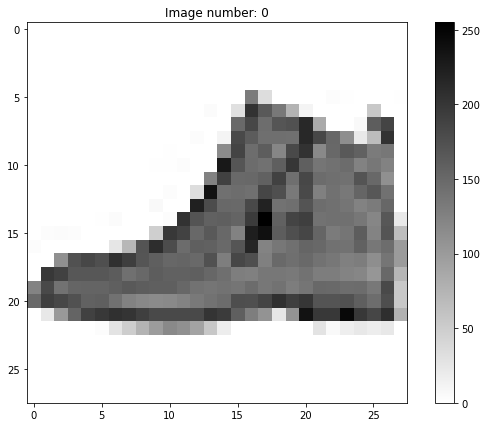

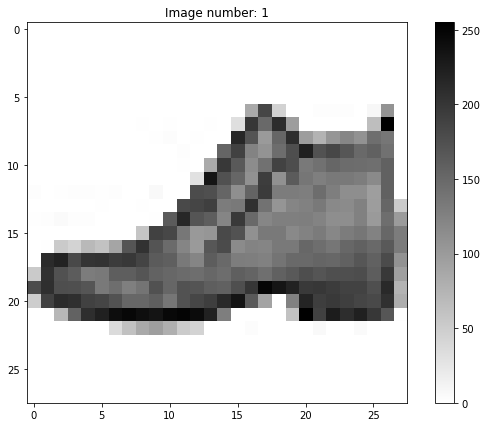

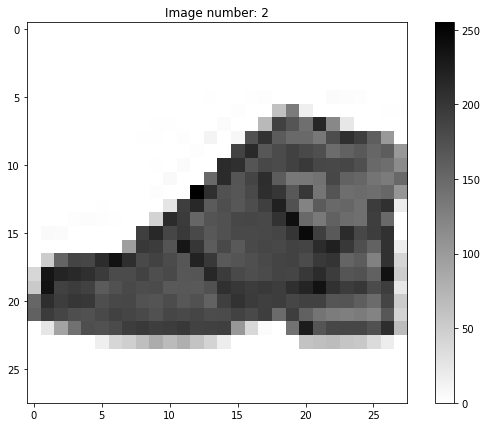

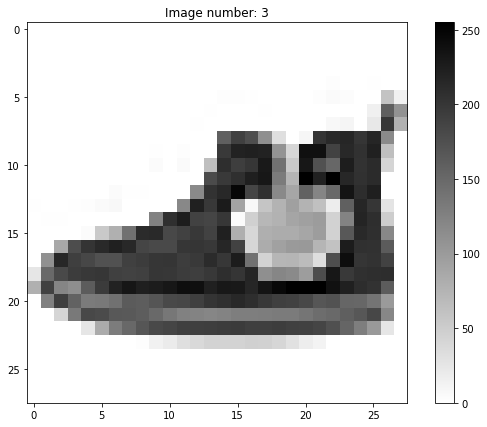

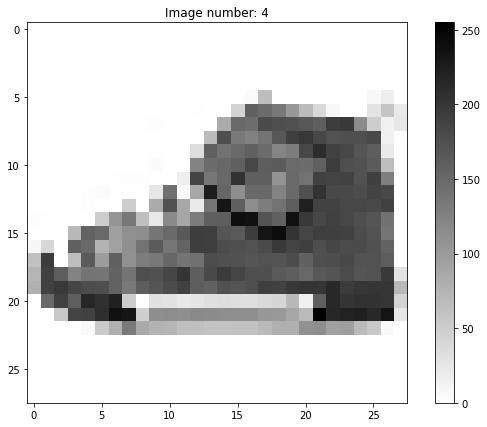

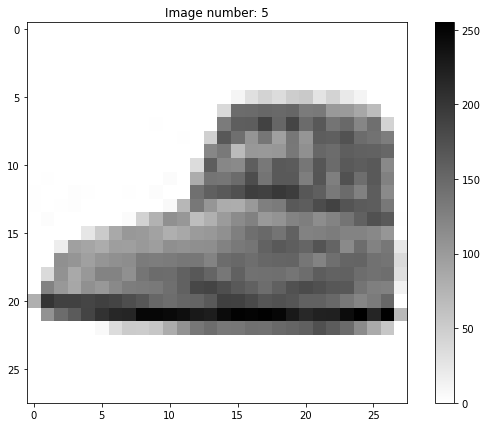

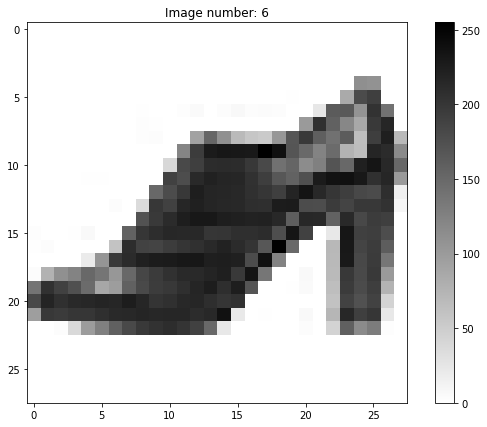

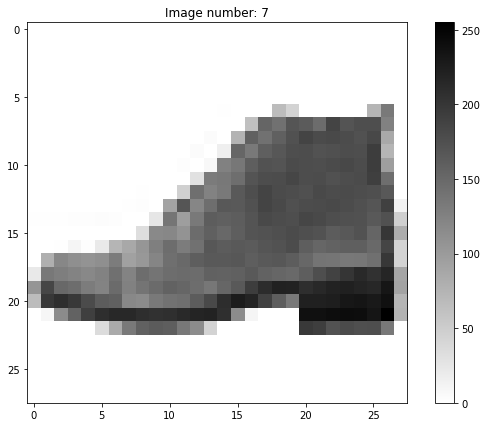

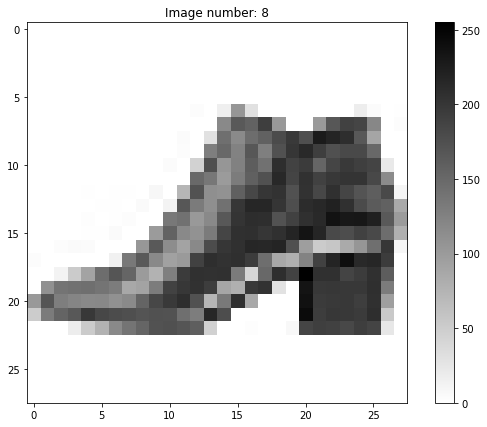

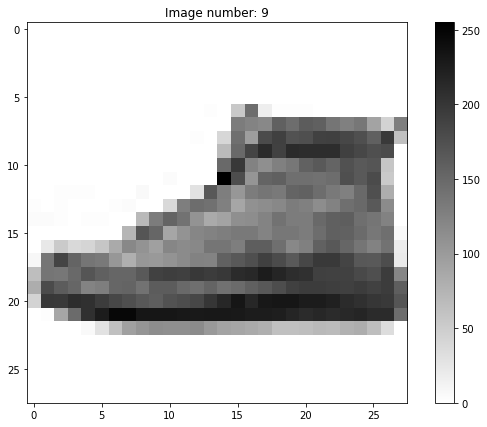

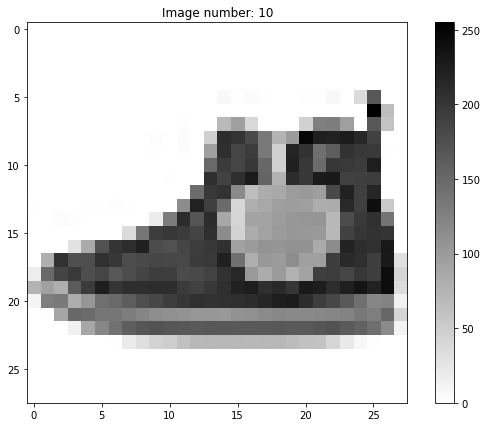

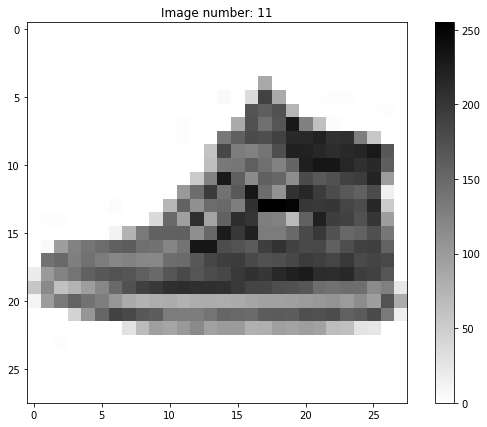

In [272]:
fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)
clust0 = 1
clust1 = 2 # ID of cluster to visualize
clust2 = 3 # ID of cluster to visualize
clust3 = 935 # ID of cluster to visualize
img = 0
clusterI = cluster_index1[clust3]
for i in clusterI:
    fig = plt.figure();
    fig.set_figheight(7)
    fig.set_figwidth(10)
    plt.imshow(Xn[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()       
    plt.title('Image number: {}'.format(img))      # affichage de l'indice de l'image dans le cluster                             
    plt.show()
    img = img+1


plt.show()

[3. 3. 3. 3. 3. 3. 3.]
[4. 2. 6. 0. 6. 6. 6. 6. 2. 6. 6. 6. 2. 6. 6. 4. 6. 4. 6. 6. 4. 6. 4. 2.
 6. 4. 6. 6. 4. 6. 4. 4. 6. 6. 6. 6. 6. 6.]
[9. 9. 9. 9. 7. 9. 9. 9. 9. 9. 9. 9.]


([<matplotlib.axis.XTick at 0x7f308d33d550>,
 [Text(0, 0, 'Tshirt'),
  Text(0, 0, 'Trouser'),
  Text(0, 0, 'Pullover'),
  Text(0, 0, 'Dress'),
  Text(0, 0, 'Coat'),
  Text(0, 0, 'Sandals'),
  Text(0, 0, 'Shirt'),
  Text(0, 0, 'Sneaker'),
  Text(0, 0, 'Bag'),
  Text(0, 0, 'Boots')])

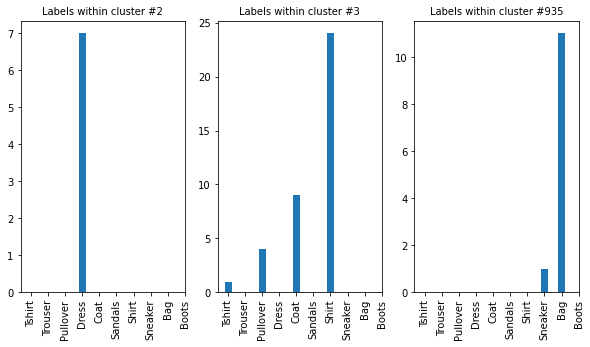

In [273]:

# Create and fill an array "clusterL" with the labels of images belonging to a cluster 
clusterL1 = []
for i in range (len(cluster_index1[clust1])):
    clusterL1.append(np.linalg.norm(yn[cluster_index1[clust1][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL2 = []
for i in range (len(cluster_index1[clust2])):
    clusterL2.append(np.linalg.norm(yn[cluster_index1[clust2][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL3 = []
for i in range (len(cluster_index1[clust3])):
    clusterL3.append(np.linalg.norm(yn[cluster_index1[clust3][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
print(np.array(clusterL1))
print(np.array(clusterL2))
print(np.array(clusterL3))
plt.figure(figsize=(10,5))
plt.subplot(131),plt.hist(clusterL1, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('2'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(132),plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('3'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(133),plt.hist(clusterL3, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('935'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.

# Analyse :
we can clearly see that in the cluster number : 2, its says it has 12 entitiesin total and almost 12 of class [6] = bag, surprisingly when we used it with pca in the first manipulation cluster number : 2, said it has 4 entities in total an almost 1000 of class [2] = t-shirts, which is totally not equal !.
##### we can also note that the execution time between pca and no pca is different: with pca : 100 seconds
###### without pca : round 500seconds
## ▶ as a conclusion we can say that 

##### With Pca we lost 10% of the informations which affected the cluster entities, so is without pca, but at final it depends the utilisation sometimes its better with pca more than pca !